### Data Preparation and Preliminary Check

In [1]:
#import library
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Visualization
import seaborn as sns # For easier statistical plotting
import datetime
sns.set_style("whitegrid")

import warnings
warnings. filterwarnings('ignore')

In [2]:
#loading the dataset from csv file
df =  pd.read_csv('transaction.csv')

In [3]:
# Check the first 5 rows of the dataframe
df.head()

,client_id,invoice_id,invoice_item_id,invoice_status,service_status,product_id,monthly_price_usd,discount,service_period,client_task,invoice_created_at,invoice_paid_at,service_cancelled_at,monthly_period,total_price,discounted_price
0,9162,872143.0,1115707,Paid,Active,4,18,0.42,1Y,Renew,2019-12-05T22:36:44Z,2019-12-25T12:30:11Z,NaN,12,216,125.28
1,246708,875146.0,841327,Paid,Active,11,39,0.14,1M,Activate,2019-12-09T04:20:49Z,2019-12-09T04:25:11Z,NaN,1,39,33.54
2,52476,856128.0,1197628,Paid,Active,12,49,0.69,1M,Renew,2019-11-20T21:24:37Z,2019-12-03T23:33:27Z,NaN,1,49,15.19
3,129362,869645.0,1004638,Paid,Active,1,6,0.44,1Y,Renew,2019-12-04T00:37:05Z,2019-12-15T13:13:30Z,NaN,12,72,40.32
4,47277,843127.0,1184209,Paid,Active,3,13,0.34,1Y,Renew,2019-11-06T21:24:30Z,2019-12-04T03:37:11Z,NaN,12,156,102.96


In [4]:
# Check number of rows and columns of the dataframe
df.shape 

(89545, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89545 entries, 0 to 89544
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   client_id             89545 non-null  int64  
 1   invoice_id            89545 non-null  float64
 2   invoice_item_id       89545 non-null  int64  
 3   invoice_status        89545 non-null  object 
 4   service_status        89545 non-null  object 
 5   product_id            89545 non-null  int64  
 6   monthly_price_usd     89545 non-null  int64  
 7   discount              89545 non-null  float64
 8   service_period        89545 non-null  object 
 9   client_task           89545 non-null  object 
 10  invoice_created_at    89545 non-null  object 
 11  invoice_paid_at       53755 non-null  object 
 12  service_cancelled_at  21756 non-null  object 
 13  monthly_period        89545 non-null  int64  
 14  total_price           89545 non-null  int64  
 15  discounted_price   

In [6]:
# Check out the summary statistics for numerical columns
df.describe()

,client_id,invoice_id,invoice_item_id,product_id,monthly_price_usd,discount,monthly_period,total_price,discounted_price
count,89545.000000,89545.000000,8.954500e+04,89545.000000,89545.000000,89545.000000,89545.000000,89545.000000,89545.000000
mean,151297.438684,737033.606176,1.022266e+06,3.727310,15.793512,0.424860,14.413624,201.450444,97.297541
std,67872.812261,85770.813728,1.130957e+05,2.722953,13.015129,1.753377,9.569462,207.633054,311.110162
min,22.000000,583739.000000,8.246620e+05,1.000000,6.000000,0.000000,1.000000,17.000000,-80049.840000
25%,101490.000000,661872.000000,9.251270e+05,2.000000,9.000000,0.310000,12.000000,108.000000,74.000000
50%,155571.000000,737965.000000,1.018091e+06,3.000000,13.000000,0.420000,12.000000,156.000000,78.000000
75%,208243.000000,810130.000000,1.113774e+06,4.000000,17.000000,0.500000,12.000000,216.000000,117.000000
max,260103.000000,882312.000000,1.234070e+06,14.000000,124.000000,514.140000,36.000000,4464.000000,4464.000000


### a. Data Cleansing

The goal of this part is to identify and remove duplicate data. 
Firstly, we need to check  invoce_id that occur more than one time. The invoce_id has to be unique value, so if they occur more than one time in our dataframe, it can be an indication of duplication.

In [7]:
dups_row = df.pivot_table(index=['invoice_id'], aggfunc='size')
print (dups_row[dups_row>1])

invoice_id
584275.0    2
584632.0    2
584664.0    4
585345.0    2
585401.0    2
           ..
882277.0    3
882283.0    2
882291.0    2
882298.0    2
882300.0    2
Length: 3373, dtype: int64


In [8]:
df[(df['invoice_id']== 584664)]

,client_id,invoice_id,invoice_item_id,invoice_status,service_status,product_id,monthly_price_usd,discount,service_period,client_task,invoice_created_at,invoice_paid_at,service_cancelled_at,monthly_period,total_price,discounted_price
52518,179749,584664.0,825892,Unpaid,Pending Setup,3,13,0.75,3Y,Activate,2018-12-21T16:02:21Z,NaN,NaN,36,468,117.0
52519,179749,584664.0,825894,Unpaid,Pending Setup,3,13,0.75,3Y,Activate,2018-12-21T16:02:21Z,NaN,NaN,36,468,117.0
52520,179749,584664.0,825895,Unpaid,Pending Setup,3,13,0.75,3Y,Activate,2018-12-21T16:02:21Z,NaN,NaN,36,468,117.0
52521,179749,584664.0,825899,Unpaid,Pending Setup,3,13,0.75,3Y,Activate,2018-12-21T16:02:21Z,NaN,NaN,36,468,117.0


From the result of the query above, there are 3373 invoice_id that have duplication in the dataset. By randomly taking one of those invoice_id, for example invoice_id = 584664, we can see that although the invoice_item_id are different however all values in other variable are the same. This clarifies our assumption of duplication. 
In the next step, all the duplication will be removed.

In [9]:
data = df.drop_duplicates(subset=['invoice_id'])

In [10]:
data[(data['invoice_id']== 584664)]

,client_id,invoice_id,invoice_item_id,invoice_status,service_status,product_id,monthly_price_usd,discount,service_period,client_task,invoice_created_at,invoice_paid_at,service_cancelled_at,monthly_period,total_price,discounted_price
52518,179749,584664.0,825892,Unpaid,Pending Setup,3,13,0.75,3Y,Activate,2018-12-21T16:02:21Z,NaN,NaN,36,468,117.0


In [11]:
data.shape

(85681, 16)

3864 duplicated rows have been deleted from the dataset, so now the datasets has 85681 records with 16 attributes.

### b. Total Revenue

In this part total number of sales along with the total revenue shared from each product will be calculated. Beforehand, the data will be filtered, so all records with invoice_status other than 'Paid' will be excluded. 

In [12]:
# filtering the data and checking the new shape
paid_data = data[(data['invoice_status']=='Paid')]
paid_data.shape

(49957, 16)

In [13]:
#calculating total revenue from the paid invoice
paid_data.discounted_price.sum()

4680053.62

In [14]:
revenue_byProduct = paid_data[['product_id' , 'discounted_price']].groupby(['product_id']).agg(['count', 'sum'])
revenue_byProduct.discounted_price.sort_values(by='sum', ascending=False)

,count,sum
product_id,,
3,21884,1982596.20
4,6225,857300.76
2,9298,676050.84
1,3641,188992.08
11,1588,187125.51
7,481,143920.00
12,1010,142894.78
14,560,141798.06
10,1302,94813.88


From the calculation we get total revenue of the company over the given period is 4,680,053.62 US dollar. The distribution of the revenue from each product is shown in table above. From the table we can see that product 3 gives a biggest contribution to the company revenue. It contributes for about 42% of the total revenue followed by product 4 and product 2. While product with the least contribution to the company sales is product 8. 

### c.  Loyal Customer

In this part, we will try to identify 100 loyal customers that will be eligible for free vouchers. 

Basicly, customer loyalty is the likelihood that customers continue purchasing from a specific company. Based on that definition, from this particular dataset the loyal costumers are those who keep renew their services. 

In [15]:
loyal_client = pd.pivot_table(paid_data, values='discounted_price', index=['client_id'],
                    columns=['client_task'], aggfunc= len)
loyal_client = loyal_client.reset_index()
loyal_client.sort_values(by='Renew',ascending=False).head(100)

client_task,client_id,Activate,Renew
620,16146,39.0,62.0
11955,131891,3.0,61.0
4648,71117,NaN,60.0
13744,143719,9.0,33.0
13258,140177,1.0,33.0
...,...,...,...
3204,56079,NaN,12.0
6718,90613,NaN,12.0
11151,126207,NaN,12.0
12184,133287,NaN,12.0


The table above contains the list of 100 most loyal customers. Those customers are selected based on the number of 'Renew' transaction that they made during the time period. 

### d. Average Payment Duration

In this part, the average time duration for clients to complete their payments will be calculated.
Firstly, we will check the distribution of all those time durations and then choose a correct central-tendency measure.


In [16]:
#converting the type of invoice_created_at and nvoice_paid_at column from object to datetime64
paid_data["invoice_created_at"] = pd.to_datetime( paid_data["invoice_created_at"]).dt.tz_convert(None)
paid_data["invoice_paid_at"] = pd.to_datetime( paid_data["invoice_paid_at"]).dt.tz_convert(None)

In [17]:
#creating new column to calculate duration to complete payments (in days)
paid_data['pay_duration'] = (paid_data["invoice_paid_at"] - paid_data["invoice_created_at"]).dt.days

In [18]:
paid_data.pay_duration.describe()

count    49956.000000
mean         5.143326
std         11.616326
min        -17.000000
25%          0.000000
50%          0.000000
75%          9.000000
max        343.000000
Name: pay_duration, dtype: float64

In [19]:
minus_pay_dur = paid_data[(paid_data['pay_duration']<0)]
minus_pay_dur

,client_id,invoice_id,invoice_item_id,invoice_status,service_status,product_id,monthly_price_usd,discount,service_period,client_task,invoice_created_at,invoice_paid_at,service_cancelled_at,monthly_period,total_price,discounted_price,pay_duration
7611,190517,625329.0,880392,Paid,Active,7,64,0.5,1Y,Activate,2019-02-26 17:00:00,2019-02-09 17:00:00,NaN,12,768,384.0,-17.0


From the result of above calculation we can see that the average time needed for the customers to complete their payment is 5 days, with the maximum time 343 days. There is one transaction that has negative value of paymeny duration, which mean this transaction has been paid before the invoice was created. this particular data set can be treated as an outlier, because it is unlikely to be happend. Next we will check does this average value of 5 really represent the distribution payment duration. 


In [20]:
# checking the distribution of payment duration
payment_duration= paid_data[['pay_duration','invoice_id']].groupby(['pay_duration']).count().reset_index()
payment_duration.rename(columns={'invoice_id': 'Total_Transaction'}, inplace=True)
payment_duration.sort_values(by='pay_duration') 

,pay_duration,Total_Transaction
0,-17.0,1
1,0.0,28274
2,1.0,2395
3,2.0,1640
4,3.0,1156
...,...,...
170,310.0,1
171,319.0,1
172,339.0,1
173,342.0,1


In [21]:
payment_7days = payment_duration[(payment_duration['pay_duration']<=7)]
payment_7days.Total_Transaction.sum()

36594

<AxesSubplot:>

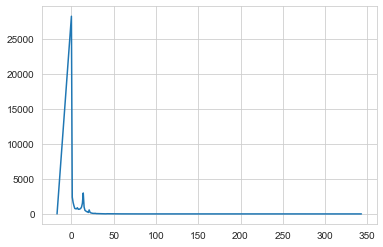

In [22]:
paid_data['pay_duration'].value_counts().sort_index().plot()

<AxesSubplot:xlabel='pay_duration'>

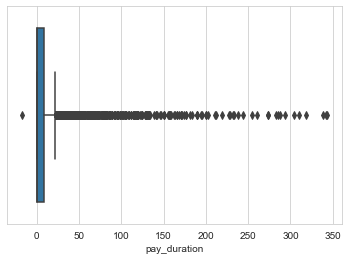

In [23]:
sns.boxplot(x=paid_data.pay_duration)

Based on the distribution of all time durations needed to complete payment, there are 28274 out of 49956 transaction payments completed within the same day (pay_duration = 0 days). this means aroud 56.6% of the transaction are made and paid in the same day. 36594 out of 49956 or aboout 73.25% of the transactions are paid within in a week.

### e. Customer Segementation based on Purchase History

In this part we will apply machine learning method for clustering which is k-means to segmentise the customers based on their transaction history. The K-means clustering algorithm aims to partitioning n observations into k clusters 
in which each observation belongs to the cluster with the nearest mean.


In the segmentation process we will calculate the RFM Score for each customers, then we appy k-means methods to cluster the customer based on their RFM Score. 


##### RFM Score

RFM is a strategy for analyzing and estimating the value of a customer, based on three data points: 

    - Recency (How recently did the customer make a purchase?)

    - Frequency (How often do they purchase)

    - Monetary Value (How much do they spend?)

In [24]:
#Latest date of transaction in the dataset
paid_data.invoice_created_at.max()

Timestamp('2019-12-16 16:11:53')

In [25]:
#Recency = Latest Date - Last Inovice Data, 
#Frequency = count of transaction(s), 
#Monetary = Sum of Total Amount for each customer
import datetime as dt

Latest_Date = dt.datetime(2019,12,16)

#Create RFM Modelling scores for each customer
RFMScores = paid_data.groupby('client_id').agg({'invoice_created_at': lambda x: (Latest_Date - x.max()).days, 
                                              'invoice_id': lambda x: len(x), 'discounted_price': lambda x: x.sum()})

#Convert Invoice Date into type int
RFMScores['invoice_created_at'] = RFMScores['invoice_created_at'].astype(int)

#Rename column names to Recency, Frequency and Monetary
RFMScores.rename(columns={'invoice_created_at': 'Recency', 
                         'invoice_id': 'Frequency', 
                         'discounted_price': 'Monetary'}, inplace=True)

RFMScores.reset_index().head(10)

,client_id,Recency,Frequency,Monetary
0,22,252,1.0,216.00
1,37,117,1.0,59.28
2,39,36,1.0,78.00
3,45,309,1.0,78.00
4,46,202,1.0,101.40
5,48,108,17.0,1024.66
6,49,317,1.0,102.96
7,52,207,2.0,140.40
8,93,73,1.0,117.00
9,108,344,1.0,78.00


<AxesSubplot:xlabel='Recency'>

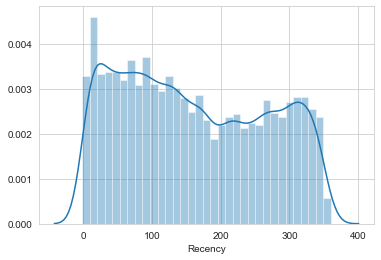

In [26]:
#Recency distribution plot
Recency = RFMScores['Recency']
sns.distplot(Recency)

##### K-Means Clustering

- Pre-processing

Firstly, we will apply pre-processing to standarise our RFM Score.In this particular data we will use StandardScaler, the idea of StandardScaler is that it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1.

In [27]:
#Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Apply handle_neg_n_zero function to Recency and Monetary columns 
RFMScores['Recency'] = [handle_neg_n_zero(x) for x in RFMScores.Recency]
RFMScores['Monetary'] = [handle_neg_n_zero(x) for x in RFMScores.Monetary]

#Perform Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = RFMScores[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

In [28]:
from sklearn.preprocessing import StandardScaler

#Bring the data on same scale
scaleobj = StandardScaler()
Scaled_Data = scaleobj.fit_transform(Log_Tfd_Data)

#Transform it back to dataframe
Scaled_Data = pd.DataFrame(Scaled_Data, index = RFMScores.index, columns = Log_Tfd_Data.columns)

- Elbow method

Secondly, Elbow method is appyed to get the best value for k

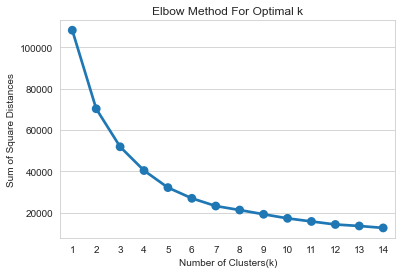

In [29]:
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(Scaled_Data)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Based on the Elbow method we get the optimal value for k = 3

- Clustering


In [30]:
#Perform K-Mean Clustering 
KMean_clust = KMeans(n_clusters= 3, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(Scaled_Data)

#Find the clusters for the observation given in the dataset
RFMScores['Cluster'] = KMean_clust.labels_
RFMScores.head(10)

,Recency,Frequency,Monetary,Cluster
client_id,,,,
22,252,1.0,216.00,0
37,117,1.0,59.28,0
39,36,1.0,78.00,1
45,309,1.0,78.00,0
46,202,1.0,101.40,0
48,108,17.0,1024.66,2
49,317,1.0,102.96,0
52,207,2.0,140.40,0
93,73,1.0,117.00,0


<Figure size 504x504 with 0 Axes>

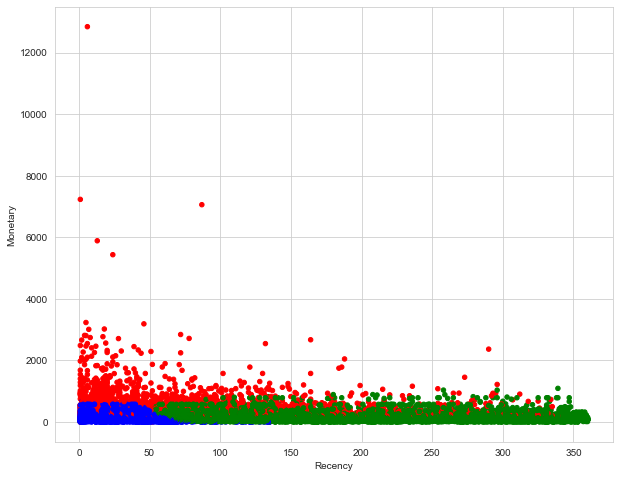

In [31]:
from matplotlib import pyplot as plt
plt.figure(figsize=(7,7))

##Scatter Plot Frequency Vs Recency
Colors = ["green", "blue", "red"]
RFMScores['Color'] = RFMScores['Cluster'].map(lambda p: Colors[p])
ax = RFMScores.plot(    
    kind="scatter", 
    x="Recency", y="Monetary",
    figsize=(10,8),
    c = RFMScores['Color']
)

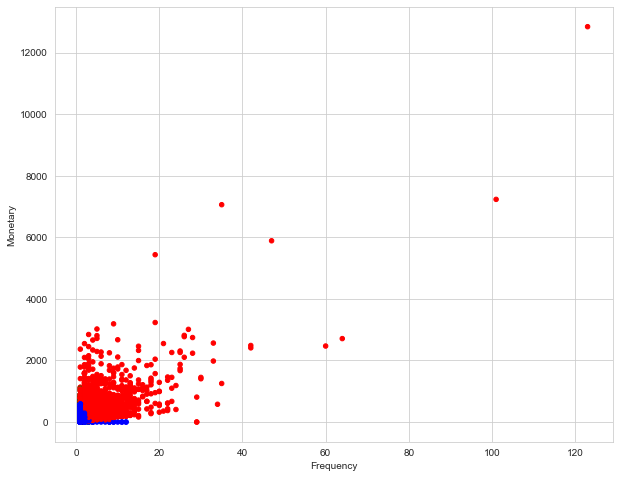

In [32]:
bx = RFMScores.plot(    
    kind="scatter", 
    x="Frequency", y="Monetary",
    figsize=(10,8),
    c = RFMScores['Color']
)

What we can do with this segmentation

- Evaluating potential profits from segments and decide with segment to focus on. 
For this data set, customers in red segment migh be costomers that the company don't want to lose, as they tend to spend higher and more frequent. While the blue segment are those who just made purcahsing recently with still lower frequency. This segment migh be our new coustomers and the company need to retain them. the blue segment are potential customers that migh turn to red segment if the company succed to retain them. 
    
- Differentiate customers based on their spending and frequency of transaction by doing this we can also personalise our marketing promotion for each segment

- Instead of giving discount to the ”loyal” customer, we can reward them with membership (Platinum, Gold, Silver membership)


### e. Further Exploration

### Revenue Trend Over The Time

In [33]:
paid_data['OrderPeriod'] = paid_data.invoice_created_at.apply(lambda x: x.strftime('%Y-%m'))

In [34]:
revenue = pd.pivot_table(paid_data, values='discounted_price', index=['OrderPeriod'], aggfunc='sum')
revenue

,discounted_price
OrderPeriod,
2018-12,47249.18
2019-01,433002.48
2019-02,393927.67
2019-03,378047.16
2019-04,340160.09
2019-05,363776.36
2019-06,343250.23
2019-07,419694.78
2019-08,460012.58


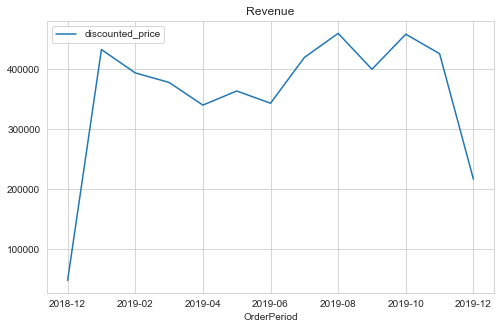

In [35]:
revenue.plot(figsize=(8, 5), title='Revenue');
plt.ticklabel_format(style='plain', axis='y')

The line graph above ilustrates that the company monthly revenue is fluctuated. The monthly revenue gradually decreased in the first six months. Generally, the monthly revenue of the company lies roughly between 340,000 USD to 430,000 USD

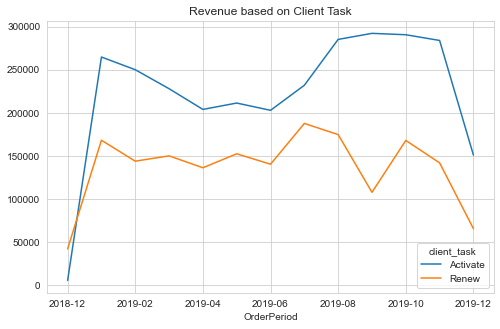

In [36]:
revenue_byClientTask = pd.pivot_table(paid_data, values='discounted_price', index=['OrderPeriod'],
                    columns=['client_task'], aggfunc='sum')

revenue_byClientTask.plot(figsize=(8, 5), title='Revenue based on Client Task');

plt.ticklabel_format(style='plain', axis='y')

The composition of monthly revenue based on the client task (Activate or Renew) can be seen in the line chart above. 
As we can see, Activate transaction contribute more to the company revenue in every month. This indicates that most of the services delivered during this period of time are new. It means the company needs to work on the customers retension.  

#### Transaction Status

<AxesSubplot:>

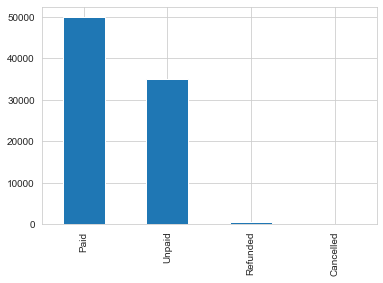

In [37]:
pd.Series(data.invoice_status).value_counts().plot(kind = 'bar')

<AxesSubplot:>

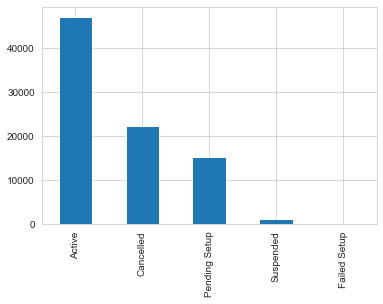

In [38]:
pd.Series(data.service_status).value_counts().plot(kind = 'bar')

#### Product Improvement

In [39]:
product_char = paid_data.groupby('product_id')['monthly_price_usd','monthly_period','discount','pay_duration'].mean().reset_index()
product_char

,product_id,monthly_price_usd,monthly_period,discount,pay_duration
0,1,6.0,16.421313,0.398025,3.241143
1,2,9.0,12.280060,0.341805,5.385137
2,3,13.0,19.229391,0.572999,3.736828
3,4,18.0,13.348434,0.424074,6.452530
4,5,24.0,6.271505,0.314355,3.750000
5,6,34.0,6.268293,0.382753,4.006969
6,7,64.0,17.259875,0.550894,2.619543
7,8,124.0,6.281690,0.358169,5.070423
8,9,17.0,2.537597,0.121333,9.477132
9,10,28.0,3.194316,0.146644,10.387865


The table above indicates that there are five products (product 9, 10, 12, 13, 14) that only have less than 4 month of average service period and those five products tend to heave higher average time duration of payments completition. The product team need to works on those five products like offering higher discount for the longer services. 

In [40]:
product_char2 = pd.pivot_table(paid_data, values='invoice_id', index=['product_id'],
                    columns=['client_task'], aggfunc= len)
product_char2 = product_char2.reset_index()
product_char2['Total Transaction'] = product_char2['Activate']+ product_char2['Renew']
product_char2

client_task,product_id,Activate,Renew,Total Transaction
0,1,2764.0,877.0,3641.0
1,2,4768.0,4530.0,9298.0
2,3,15047.0,6837.0,21884.0
3,4,2812.0,3413.0,6225.0
4,5,529.0,215.0,744.0
5,6,191.0,96.0,287.0
6,7,399.0,82.0,481.0
7,8,48.0,23.0,71.0
8,9,801.0,1779.0,2580.0
9,10,268.0,1034.0,1302.0


Five product that have lowest number of transactions are Products 6, 7, 8, 13, 14. The number of transaction for both Activate and Renew services for these product are relatively low compare to other product. So, as a suggestion, marketing team needs to think marketing strategy to promote these products like free trial or 
exposing promotion (push notification / email notification) about the products. While, the product teams need to improve the serveces to retain the existing customers. 

In [41]:
#different aggregate functions
paid_services = pd.pivot_table(paid_data, values='invoice_id', index=['product_id'],
                    columns=['service_status'], aggfunc=len)

paid_services 

service_status,Active,Cancelled,Failed Setup,Pending Setup,Suspended
product_id,,,,,
1,3474.0,110.0,4.0,NaN,53.0
2,8997.0,204.0,6.0,NaN,91.0
3,21288.0,418.0,10.0,2.0,166.0
4,6008.0,167.0,3.0,NaN,47.0
5,560.0,158.0,1.0,NaN,25.0
6,224.0,57.0,1.0,NaN,5.0
7,415.0,62.0,NaN,NaN,4.0
8,51.0,19.0,NaN,NaN,1.0
9,1366.0,1038.0,NaN,NaN,176.0


<AxesSubplot:>

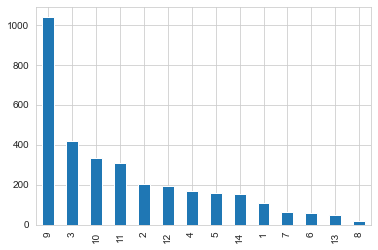

In [42]:
canceled_paidTx = paid_data[ paid_data['service_status']=='Cancelled']
pd.Series(canceled_paidTx.product_id).value_counts().plot(kind = 'bar')

The number of cancelled services for some product is still very high. Taking product 9 into example, 1038 out of 2580 paid transactions are cancelled. Asking customers about feedback or the reason of cancelitation will help the product team to improve the product services and reduce the cancellitation rate. 

In [43]:
unpaidTx = data[data['invoice_status']=='Unpaid']
unpaidTx_services = pd.pivot_table(unpaidTx, values='invoice_id', index=['product_id'],
                    columns=['service_status'], aggfunc=len)

unpaidTx_services 

service_status,Active,Cancelled,Failed Setup,Pending Setup,Suspended
product_id,,,,,
1,70.0,1791.0,1.0,1840.0,22.0
2,384.0,5555.0,1.0,2360.0,40.0
3,379.0,6462.0,4.0,8073.0,75.0
4,123.0,2734.0,1.0,1614.0,23.0
5,21.0,125.0,1.0,200.0,9.0
6,11.0,48.0,NaN,69.0,2.0
7,15.0,48.0,1.0,180.0,2.0
8,5.0,24.0,NaN,50.0,1.0
9,53.0,783.0,NaN,326.0,65.0


From the table above we can clearly see that there are still some unpaid transaction that have active services. This data can be delivered to collection staff, so they can send reminder to the customers. While for the cancelled services in the unpaid transaction, asking customers about the reason of cancelitation will help the product team to improve the product services and reduce the cancellitation rate.